# Introduction
The main purpose of this project is for the submission of Data Management & Business Analytics project Assignment. For this assignment we are given a 2 datasets on COE prices and we are asked to predict them. Moreover, in this assignment, i have research some factors that affect COE and also used as form of data for comparison and trend analysis!
## DataSet Information 
##### I have used the latest dataset from LTA.gov.sg as lms dataset is not updated till may 2022.
###### our project is on open category so since open category does not include motorcycles , i have removed them in Excel and then loaded in this notebook
This dataset has columns such as Date recieved, Bidding no, No.of bids received, No of bids that was successful and quota that LTA gave for that date/month, and the premium ( add later) 

##### This is a standard supervised regression problem. A regression problem where we have to predict the price of car which is a continuous data value.

#### Below is the dataset attributes with description - Data Dictionary
| Column | Description |
| --- | --- |
| month | the month and year recieved |
| bidding no.| is it the first bid or second bid|
|vehicle_class | tells which car category does it fall on. there are 7 categories in this column. Category A: Cars with engine capacity up to 1,600cc & power output 97kW.Category B : Cars with engine capacity above 1,600cc or power output 97kW.Category C : Goods carrying vehicle and bus.Category D : Motorcycle.Category E : An open category applicable for all of the above mentioned, except motorcycles.|
|quota | the number of new vehicles allowed for registration by LTA |
| bids_sucess| no.of bids that became successful 
| bids_received| no.of bids that were received
| premium | This is the target variable which is the price of the coe cars
### another dataset have an extra column called pqp 
| Column | Description |
| --- | --- |
|pqp| this is the amount of price paid for extension of 5 or 10 years after your original 10 year of car coe expires |

     
     This dataset was found in brightspace.com
   




In [2]:
# import dataset
import pandas as pd
import matplotlib.pyplot as plt
data_table = pd.read_csv("data/M11-coe_results.csv")

In [3]:
data_table

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889
...,...,...,...,...,...,...,...
1455,2022-05,2,Category A,625,623,819,68001
1456,2022-05,2,Category B,528,523,709,95889
1457,2022-05,2,Category C,103,103,220,51501
1458,2022-05,2,Category D,609,600,899,9490


In [4]:
data_table.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889


In [5]:
#summarise of all the columns we have: 
data_table.columns

Index(['month', 'bidding_no', 'vehicle_class', 'quota', 'bids_success',
       'bids_received', 'premium'],
      dtype='object')

In [6]:
#shows the number of rows and columns
data_table.shape

(1460, 7)

In [7]:
# describe dataset
data_table.describe()

,bidding_no,quota,bids_success,bids_received,premium
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.500000,595.176712,585.723288,885.816438,42933.002055
std,0.500171,443.649801,442.201171,663.230808,25099.987659
min,1.000000,76.000000,61.000000,147.000000,852.000000
25%,1.000000,316.750000,308.750000,450.000000,27317.750000
50%,1.500000,416.500000,408.500000,647.000000,44695.000000
75%,2.000000,705.000000,698.250000,1087.500000,59999.250000
max,2.000000,2272.000000,2246.000000,4545.000000,99999.000000


In [8]:
#check if there is any null values in our dataset
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          1460 non-null   object
 1   bidding_no     1460 non-null   int64 
 2   vehicle_class  1460 non-null   object
 3   quota          1460 non-null   int64 
 4   bids_success   1460 non-null   int64 
 5   bids_received  1460 non-null   int64 
 6   premium        1460 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 80.0+ KB


In [9]:
#check if data is balanced
print(data_table.groupby('vehicle_class').size())
#data set is balanced 

vehicle_class
Category A    292
Category B    292
Category C    292
Category D    292
Category E    292
dtype: int64


In [10]:
data_table.isnull().sum()

month            0
bidding_no       0
vehicle_class    0
quota            0
bids_success     0
bids_received    0
premium          0
dtype: int64

In [20]:
#ccheck for duplicates
data_table.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

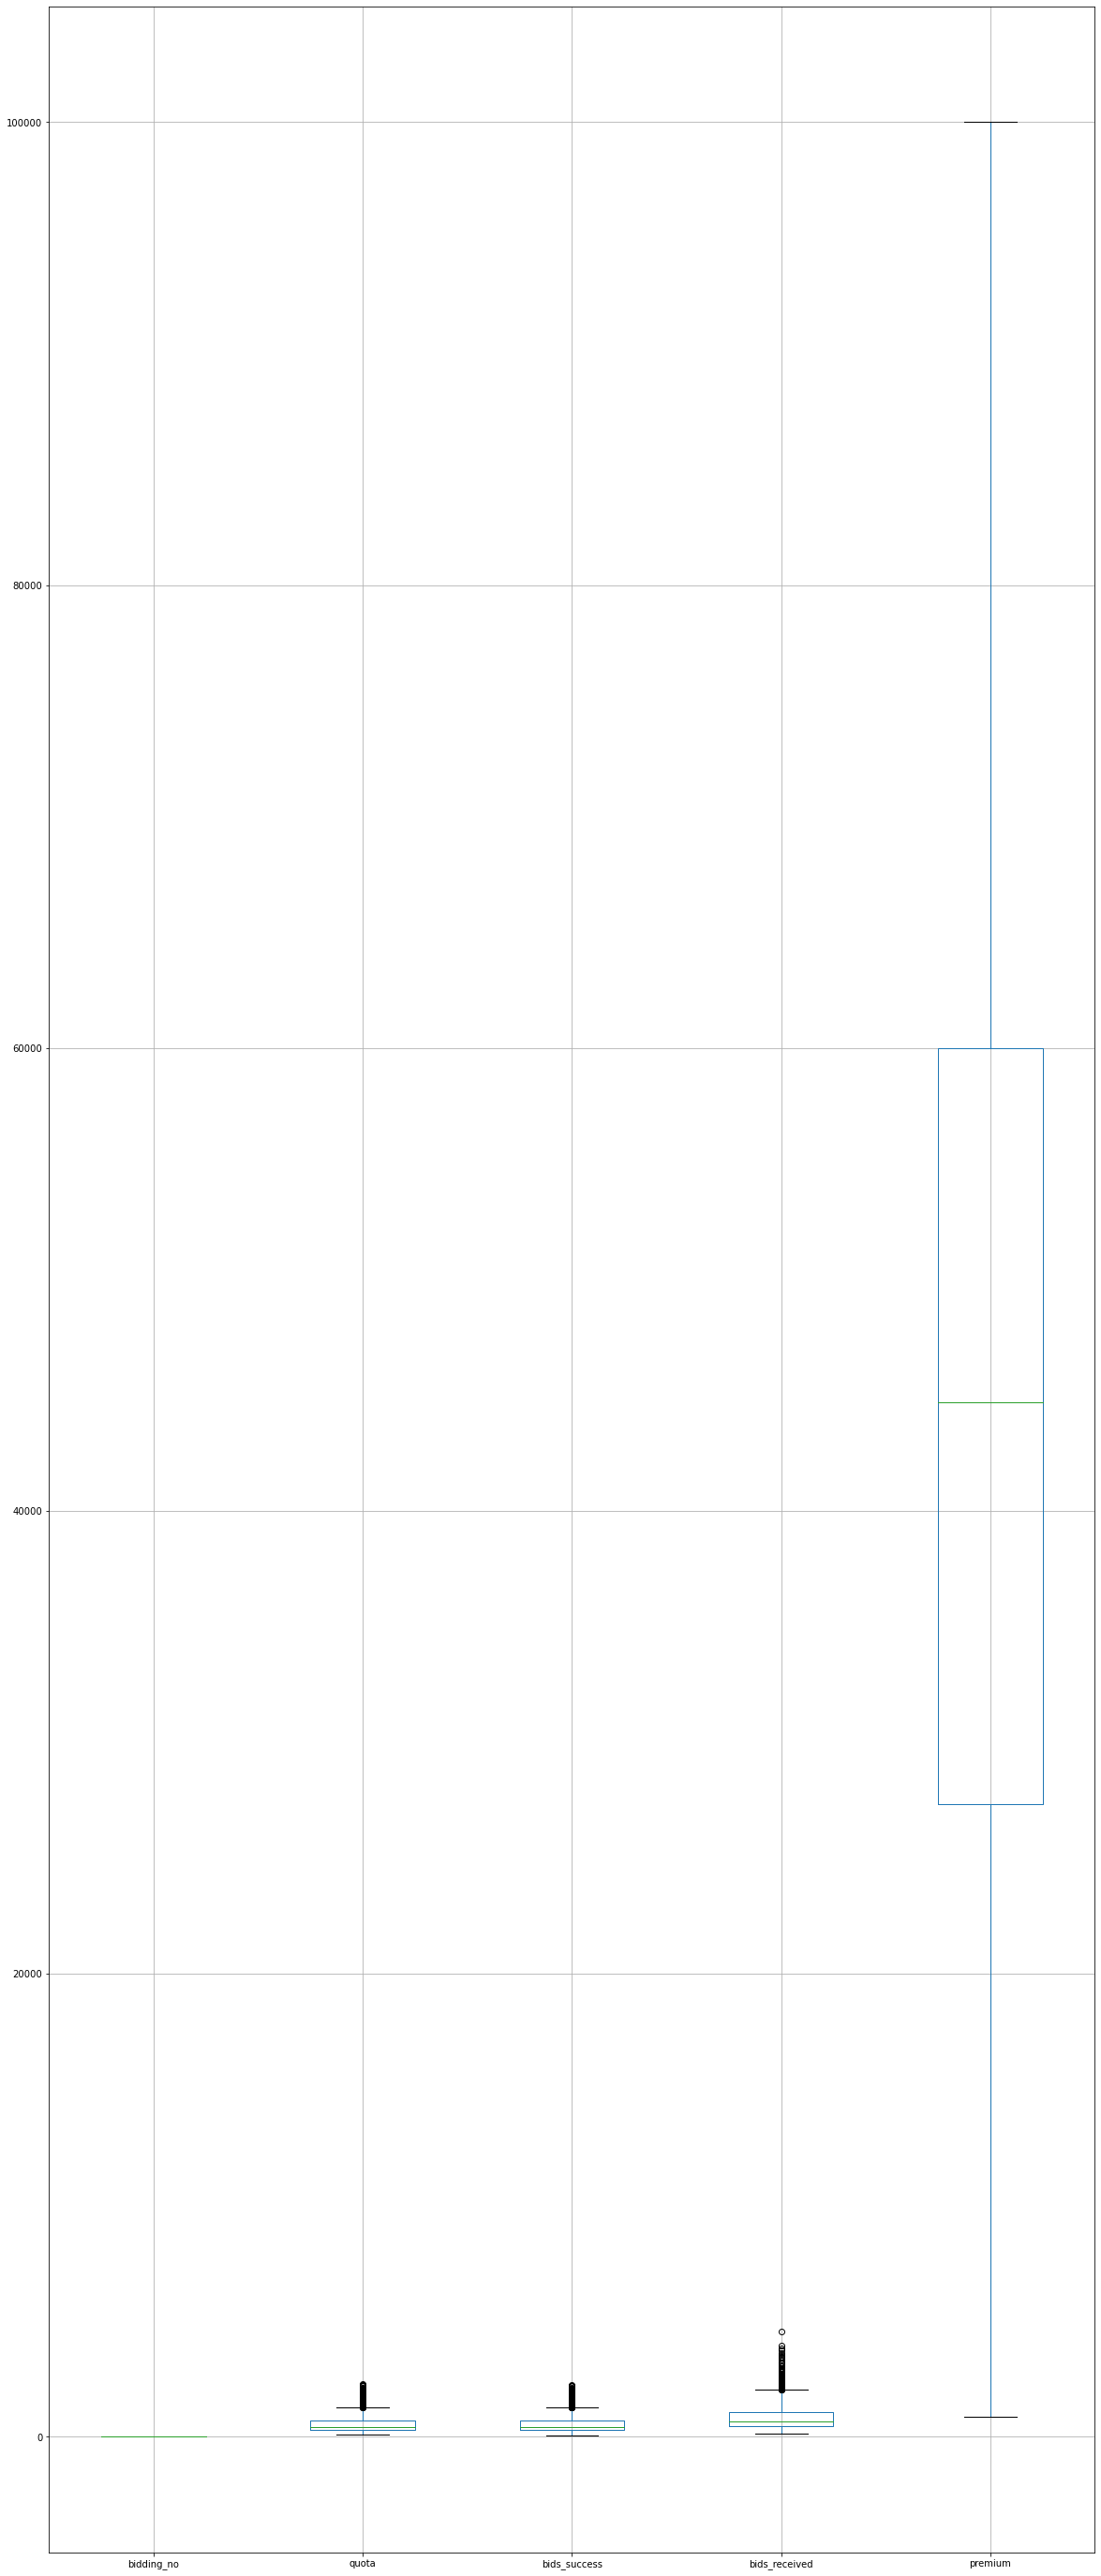

In [11]:
# check if theres any outliers
import matplotlib.pyplot as plt
data_table.boxplot(figsize=(20,50))
plt.show()

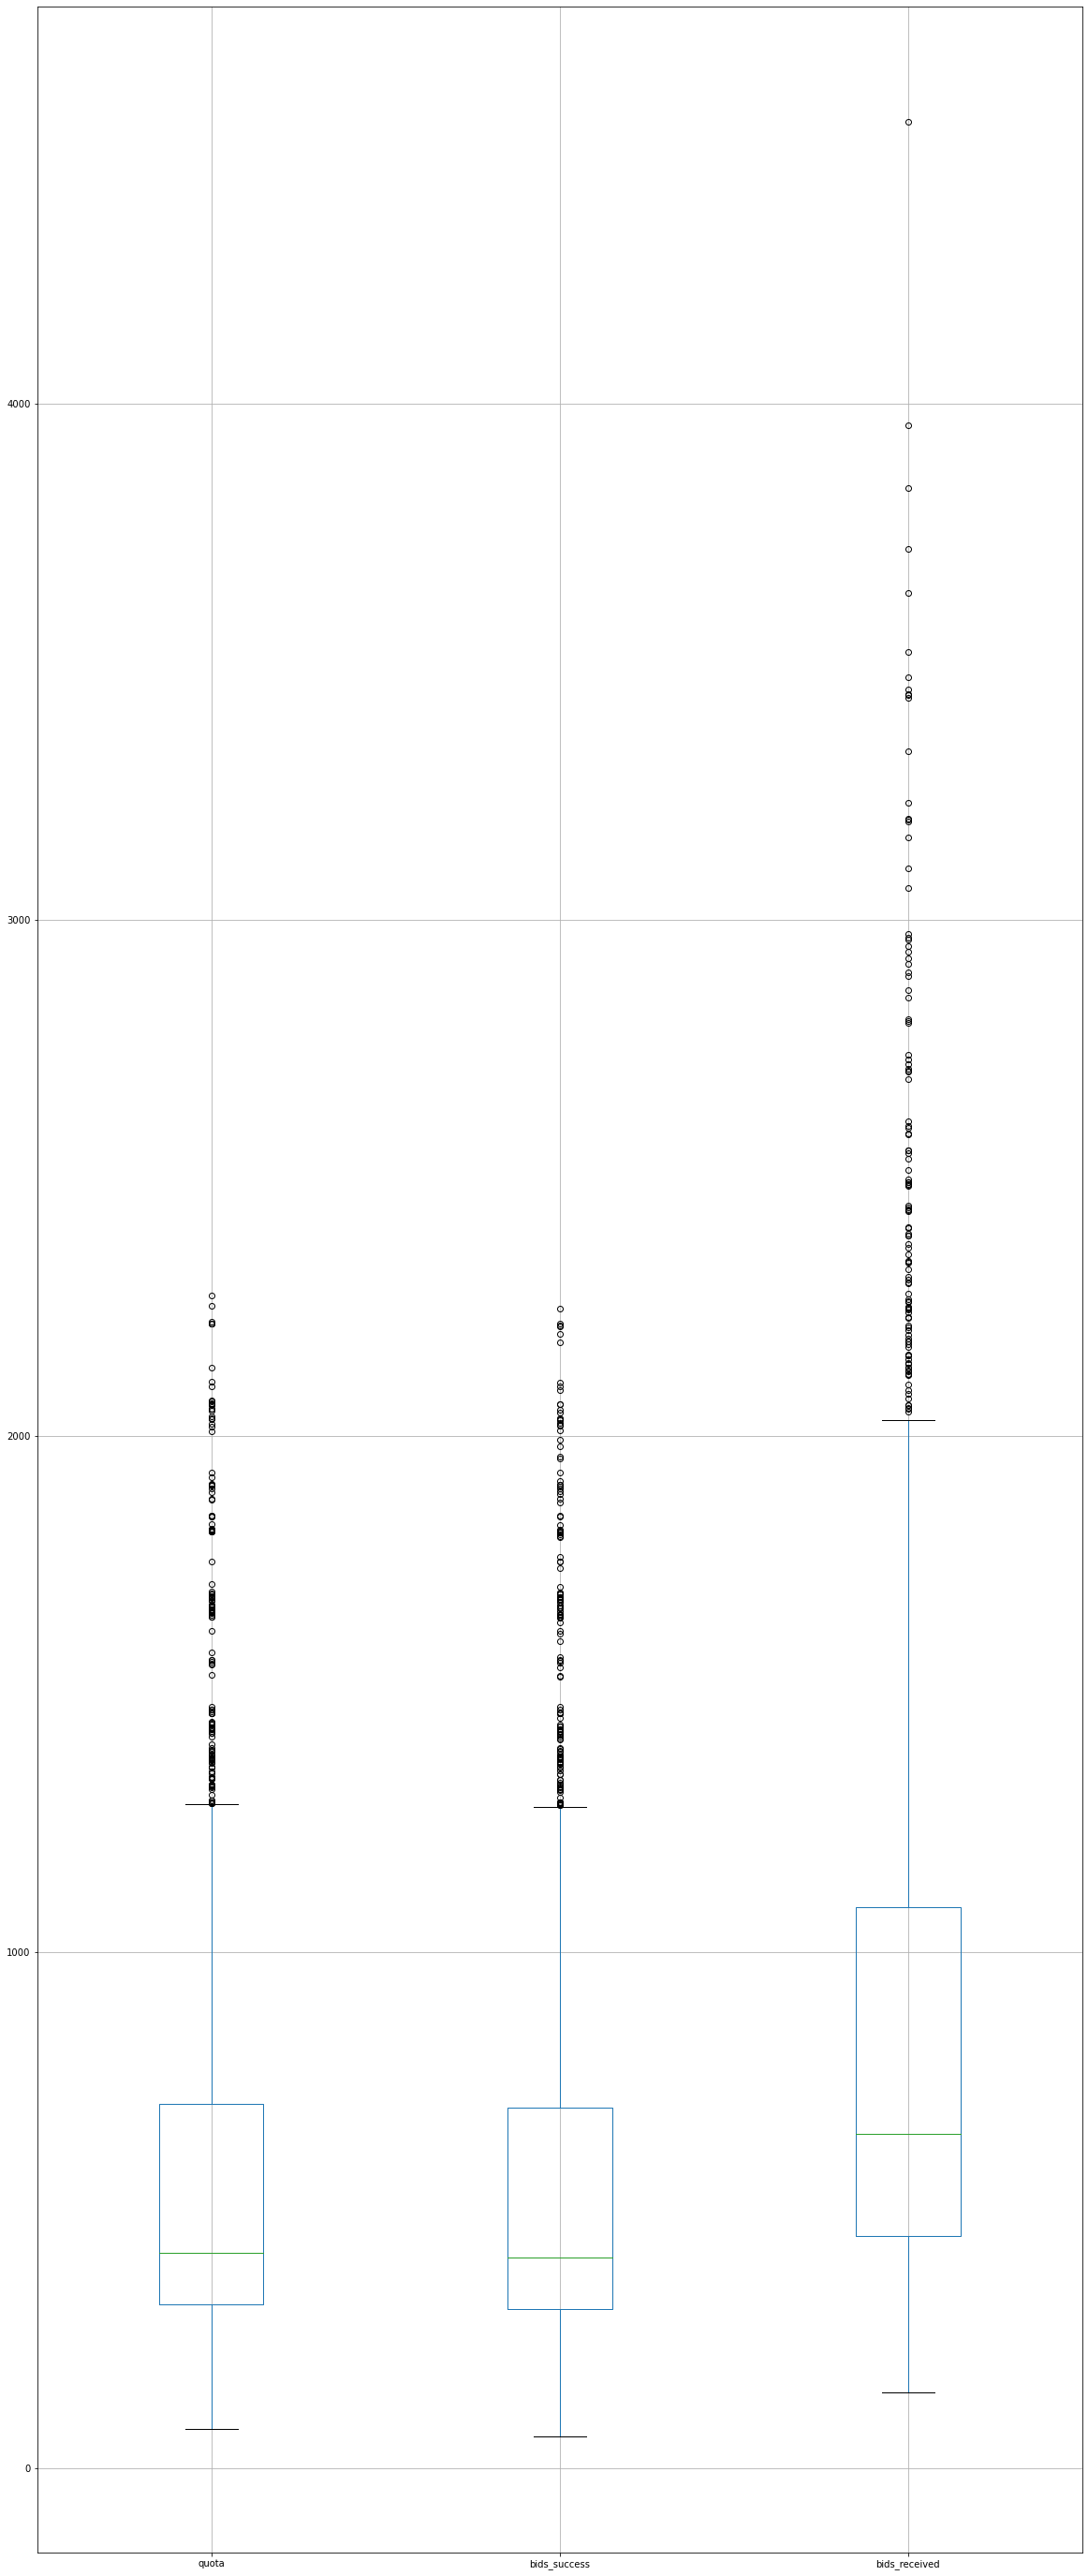

In [12]:
# checking more vividly
import matplotlib.pyplot as plt
data_table.boxplot(column=['quota','bids_success','bids_received'],figsize=(20,50))
plt.show()

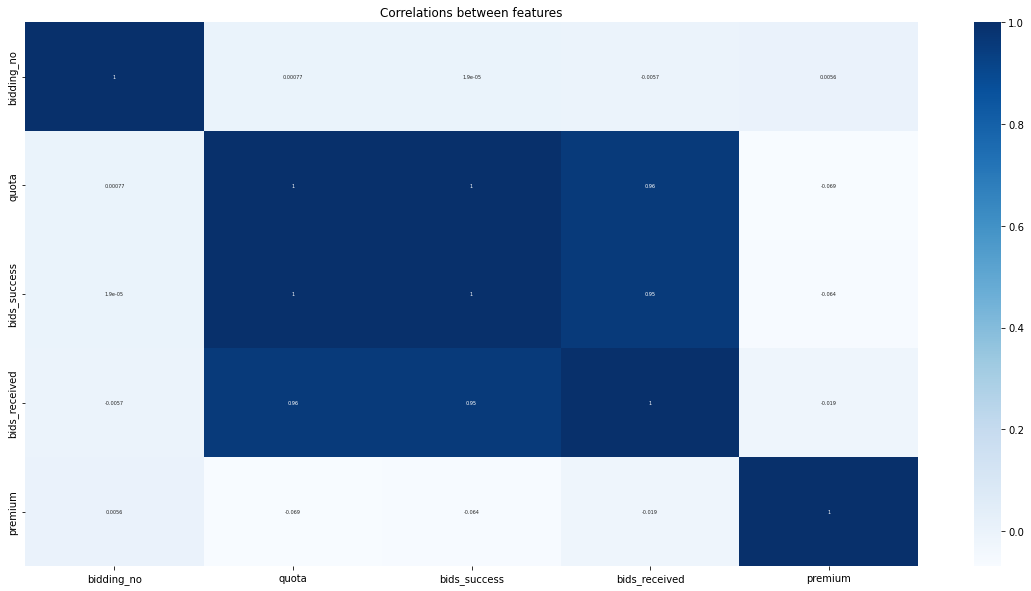

In [15]:
## since there are outliers for bids_success, bids_received & quota then lets see if theres a correlation
# and if there is no correlation, then we will do some changing of values 
# find if there is any high correlation between features
import seaborn as sns
fig = plt.subplots (figsize = (20, 10))
sns.heatmap(data_table.corr(),annot=True, annot_kws={"size": 5},cmap = "Blues")
plt.title('Correlations between features')
plt.show ()

In [16]:
# bids_success, bids received are correlated but not correlated with premium 
# quota and bids are also correlated 
#so i decide to not remove the outliers as it has too many outliers and removing them or changing them might mislead the results

In [175]:
## lets explore the dataset first! 

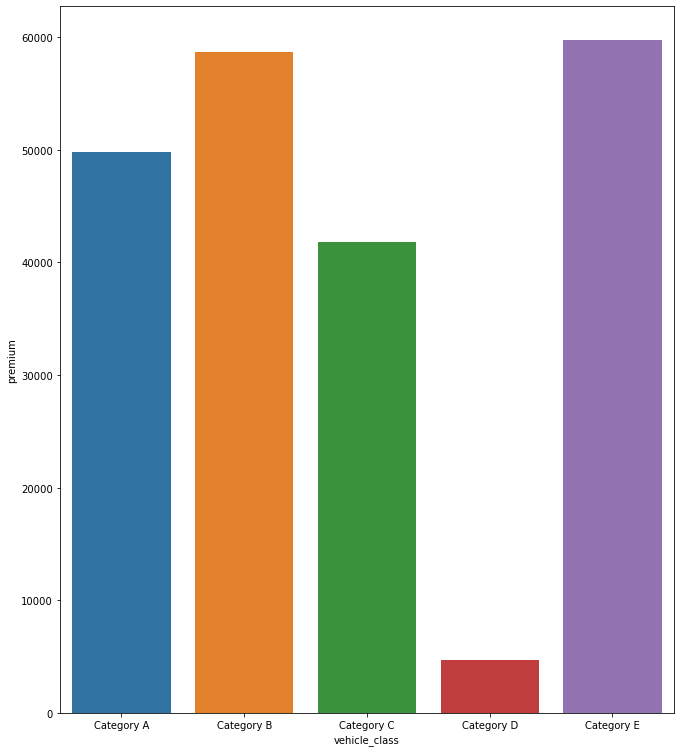

In [176]:
import seaborn as sns
fig = plt.subplots (figsize = (11, 13))
sns.barplot(x='vehicle_class',y='premium',data=data_table,ci= None)
plt.show()

In [23]:
# adding a year column 
import datetime
data_table['year'] = pd.to_datetime(data_table['month'])

<AxesSubplot:xlabel='year', ylabel='premium'>

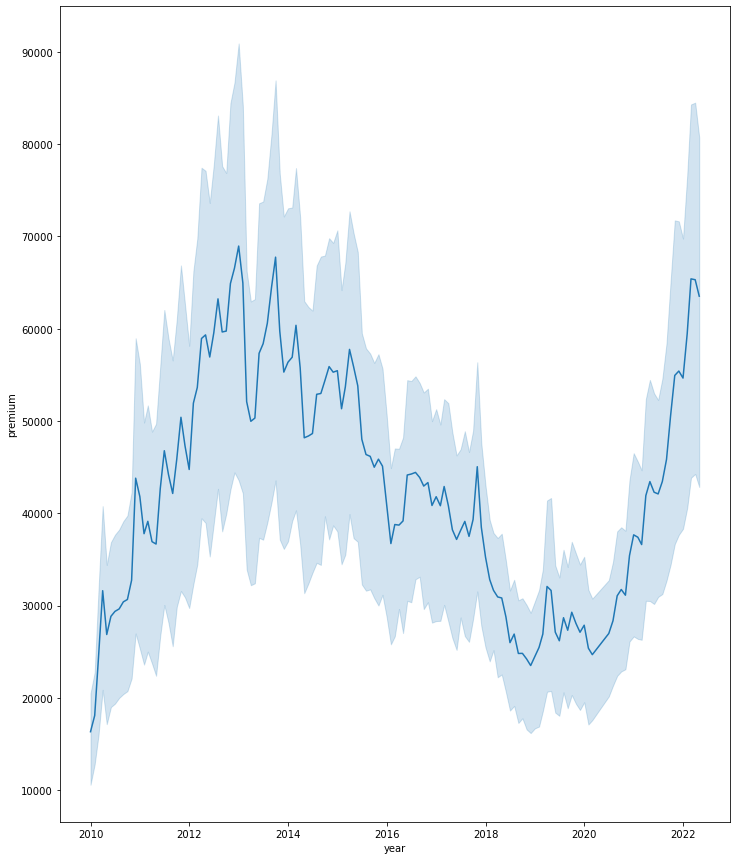

In [24]:
# plotting a line plot to show the trend of coe price
import seaborn as sns
fig = plt.subplots (figsize = (12, 15))
sns.lineplot(x="year", y="premium",
             data=data_table)

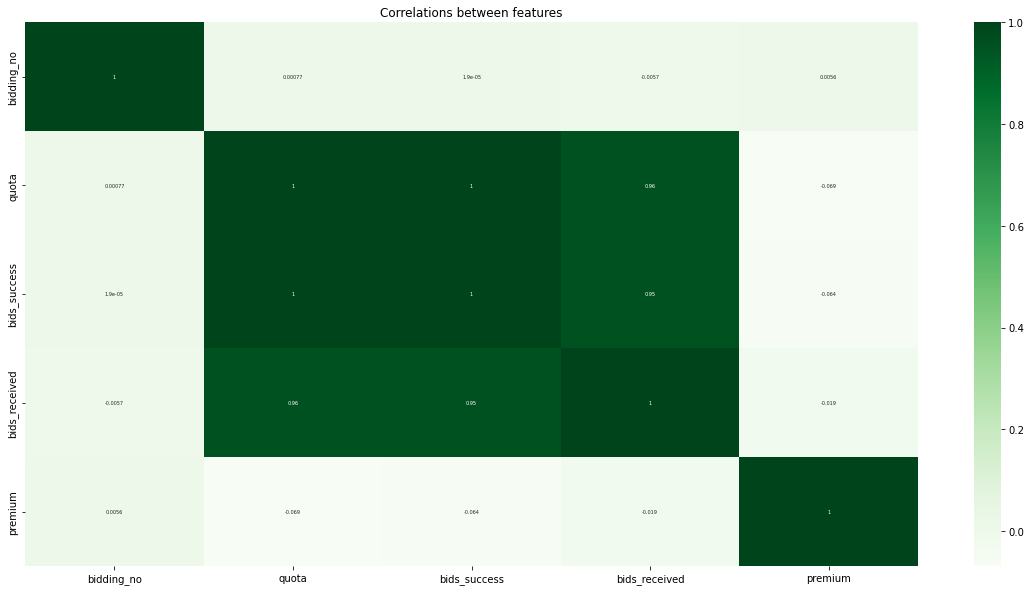

In [33]:
# find if there is any high correlation between features to Premium Price
#find the most influential feature between features
import seaborn as sns
fig = plt.subplots (figsize = (20, 10))
sns.heatmap(data_table.corr(),annot=True, annot_kws={"size": 5},cmap = "Greens")
plt.title('Correlations between features')
plt.show ()

###### while looking at the dataset and the heat map, there are some data columns that we dont need as it does not give much correlation.

###### Bids_received, Bids_success is not as needed to predict a price of a car. however even though the heat map tells us that quota is less correlated, based on knowledge and theory we know coe is about supply and demand, so we will not drop that column. bids_recieved, bids_success can be dropped.Since each month of the dataset contains 1st and 2nd bid quota and premium seperately, we will take the average of both for that month.

###### Open Category includes all except motorcycles so we will need to remove Category D

### After Removing those columns

In [227]:
data_table2 = pd.read_csv("data/M11-coe_results_edited2.csv")

In [228]:
#shows the number of rows and columns
data_table2.shape

(584, 4)

In [229]:
#summarise of all the columns we have: 
data_table2.columns

Index(['month', 'vehicle_class', 'Adjusted_Quota', 'Adj_Prem'], dtype='object')

In [230]:
#check if data is balanced
print(data_table2.groupby('vehicle_class').size())
#data set is balanced 

vehicle_class
Category A    146
Category B    146
Category C    146
Category E    146
dtype: int64


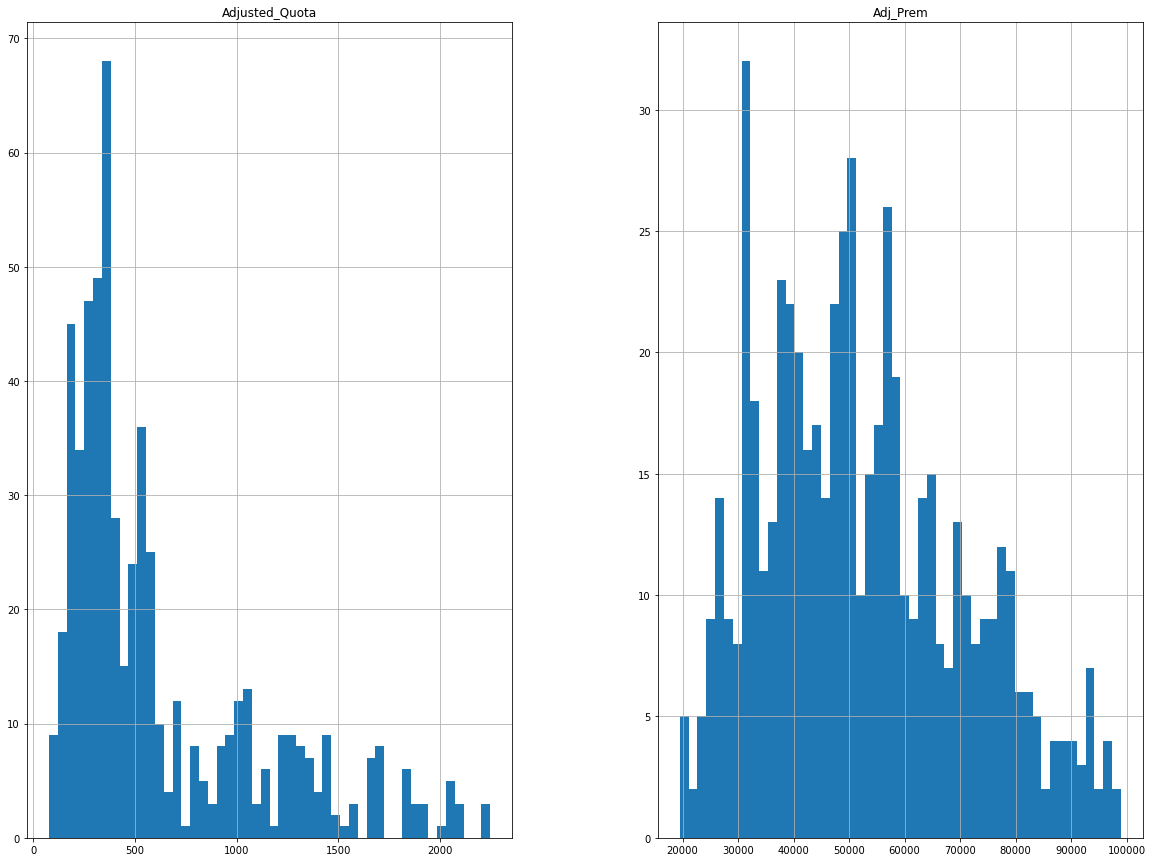

In [231]:
data_table2.hist(bins=50,figsize=(20,15))
plt.show()

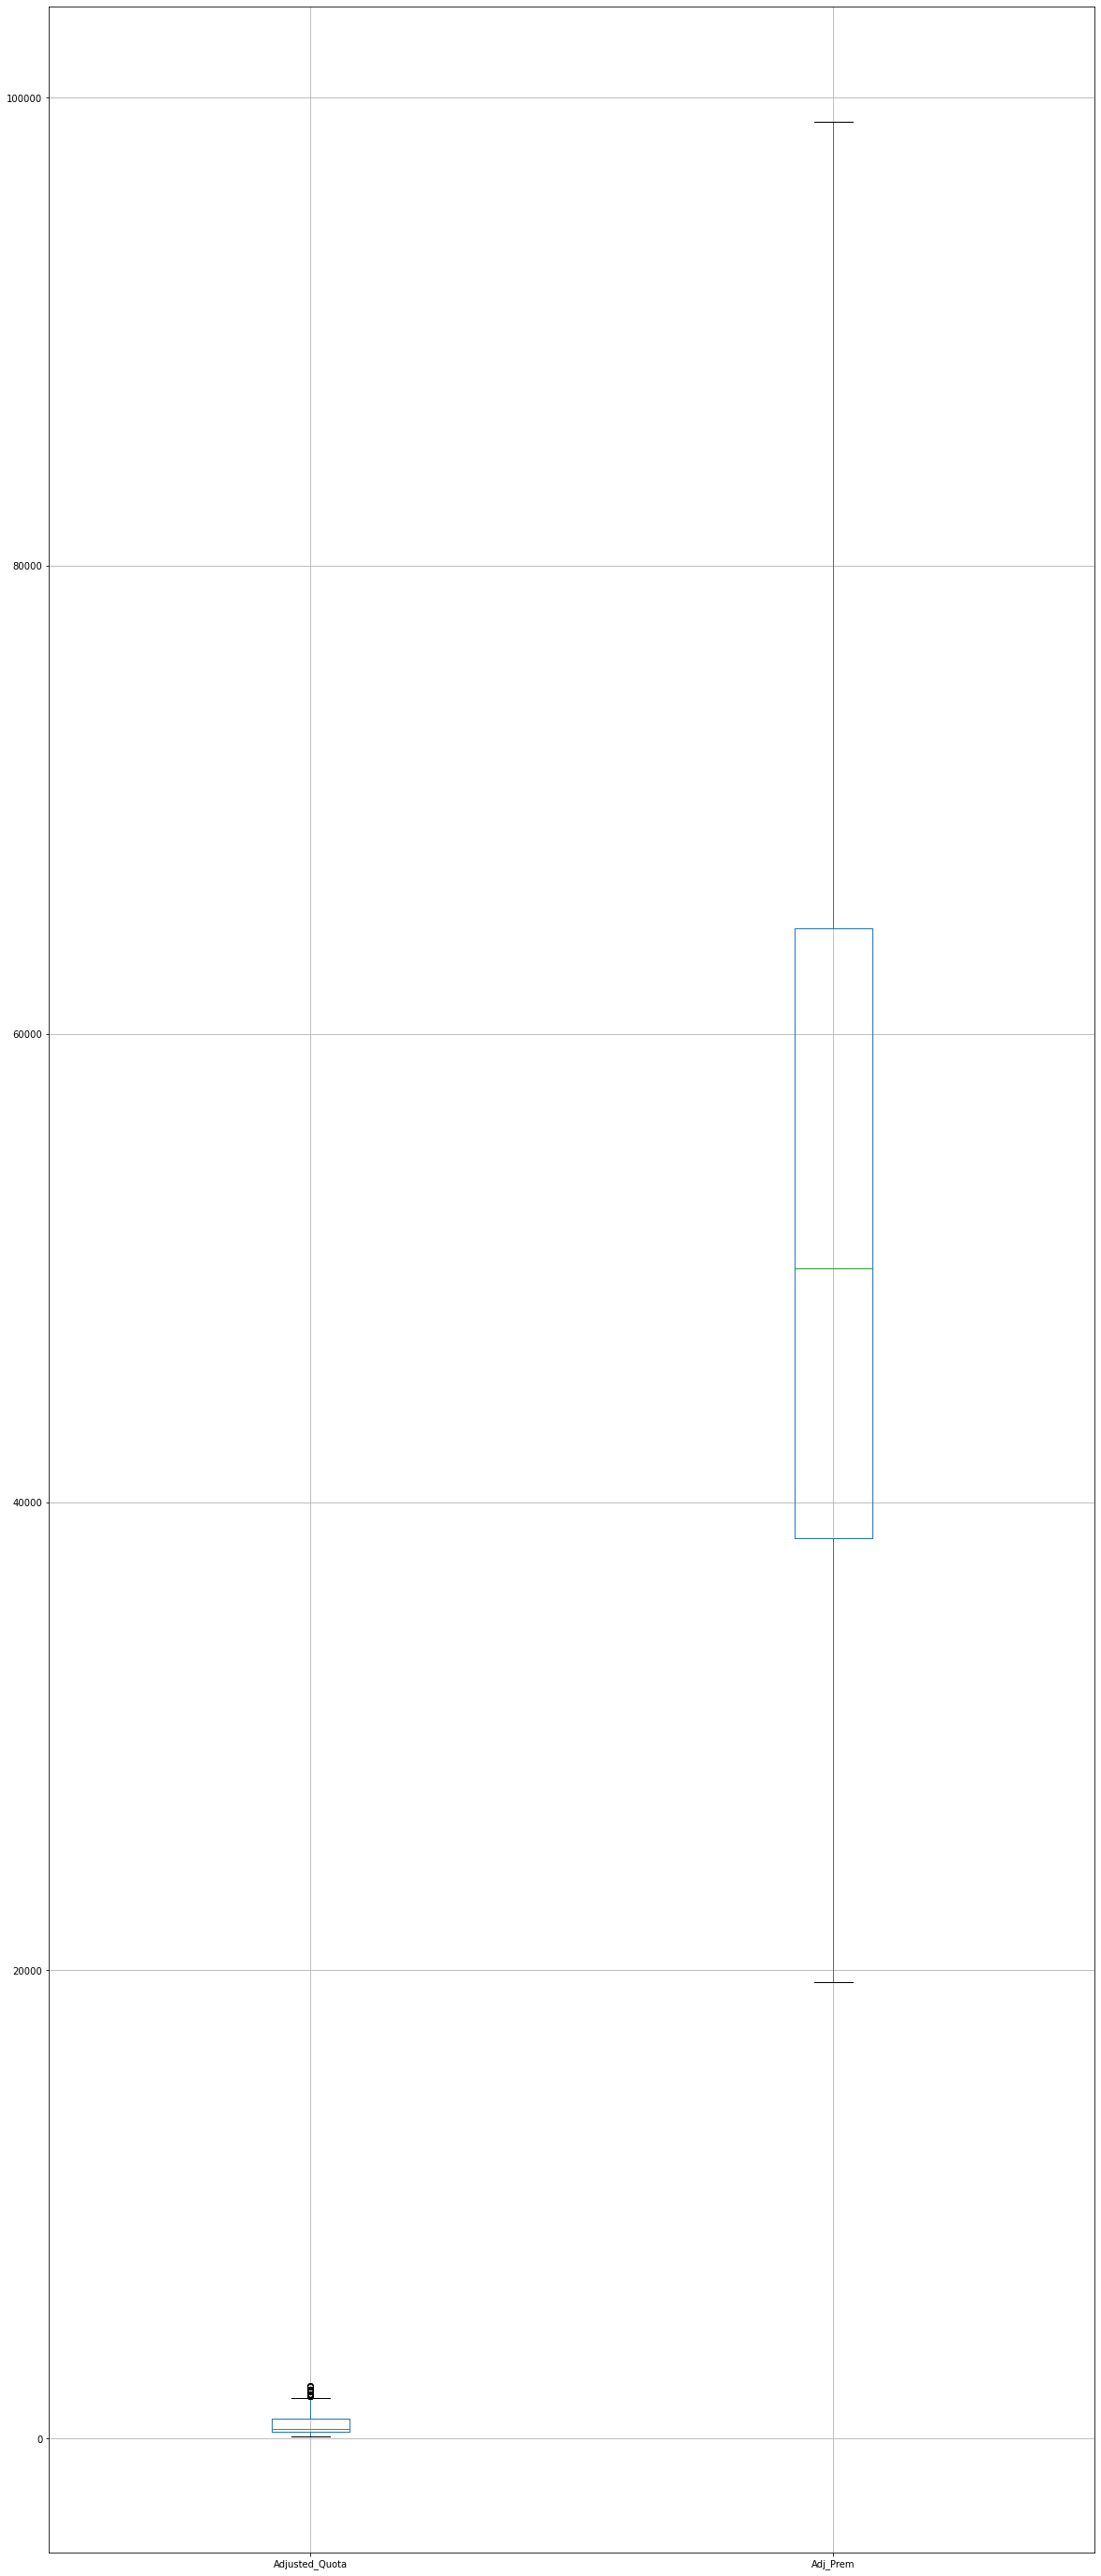

In [232]:
# check if theres any outliers
import matplotlib.pyplot as plt
data_table2.boxplot(figsize=(20,50))
plt.show()

##### visually its hard to see the quota 

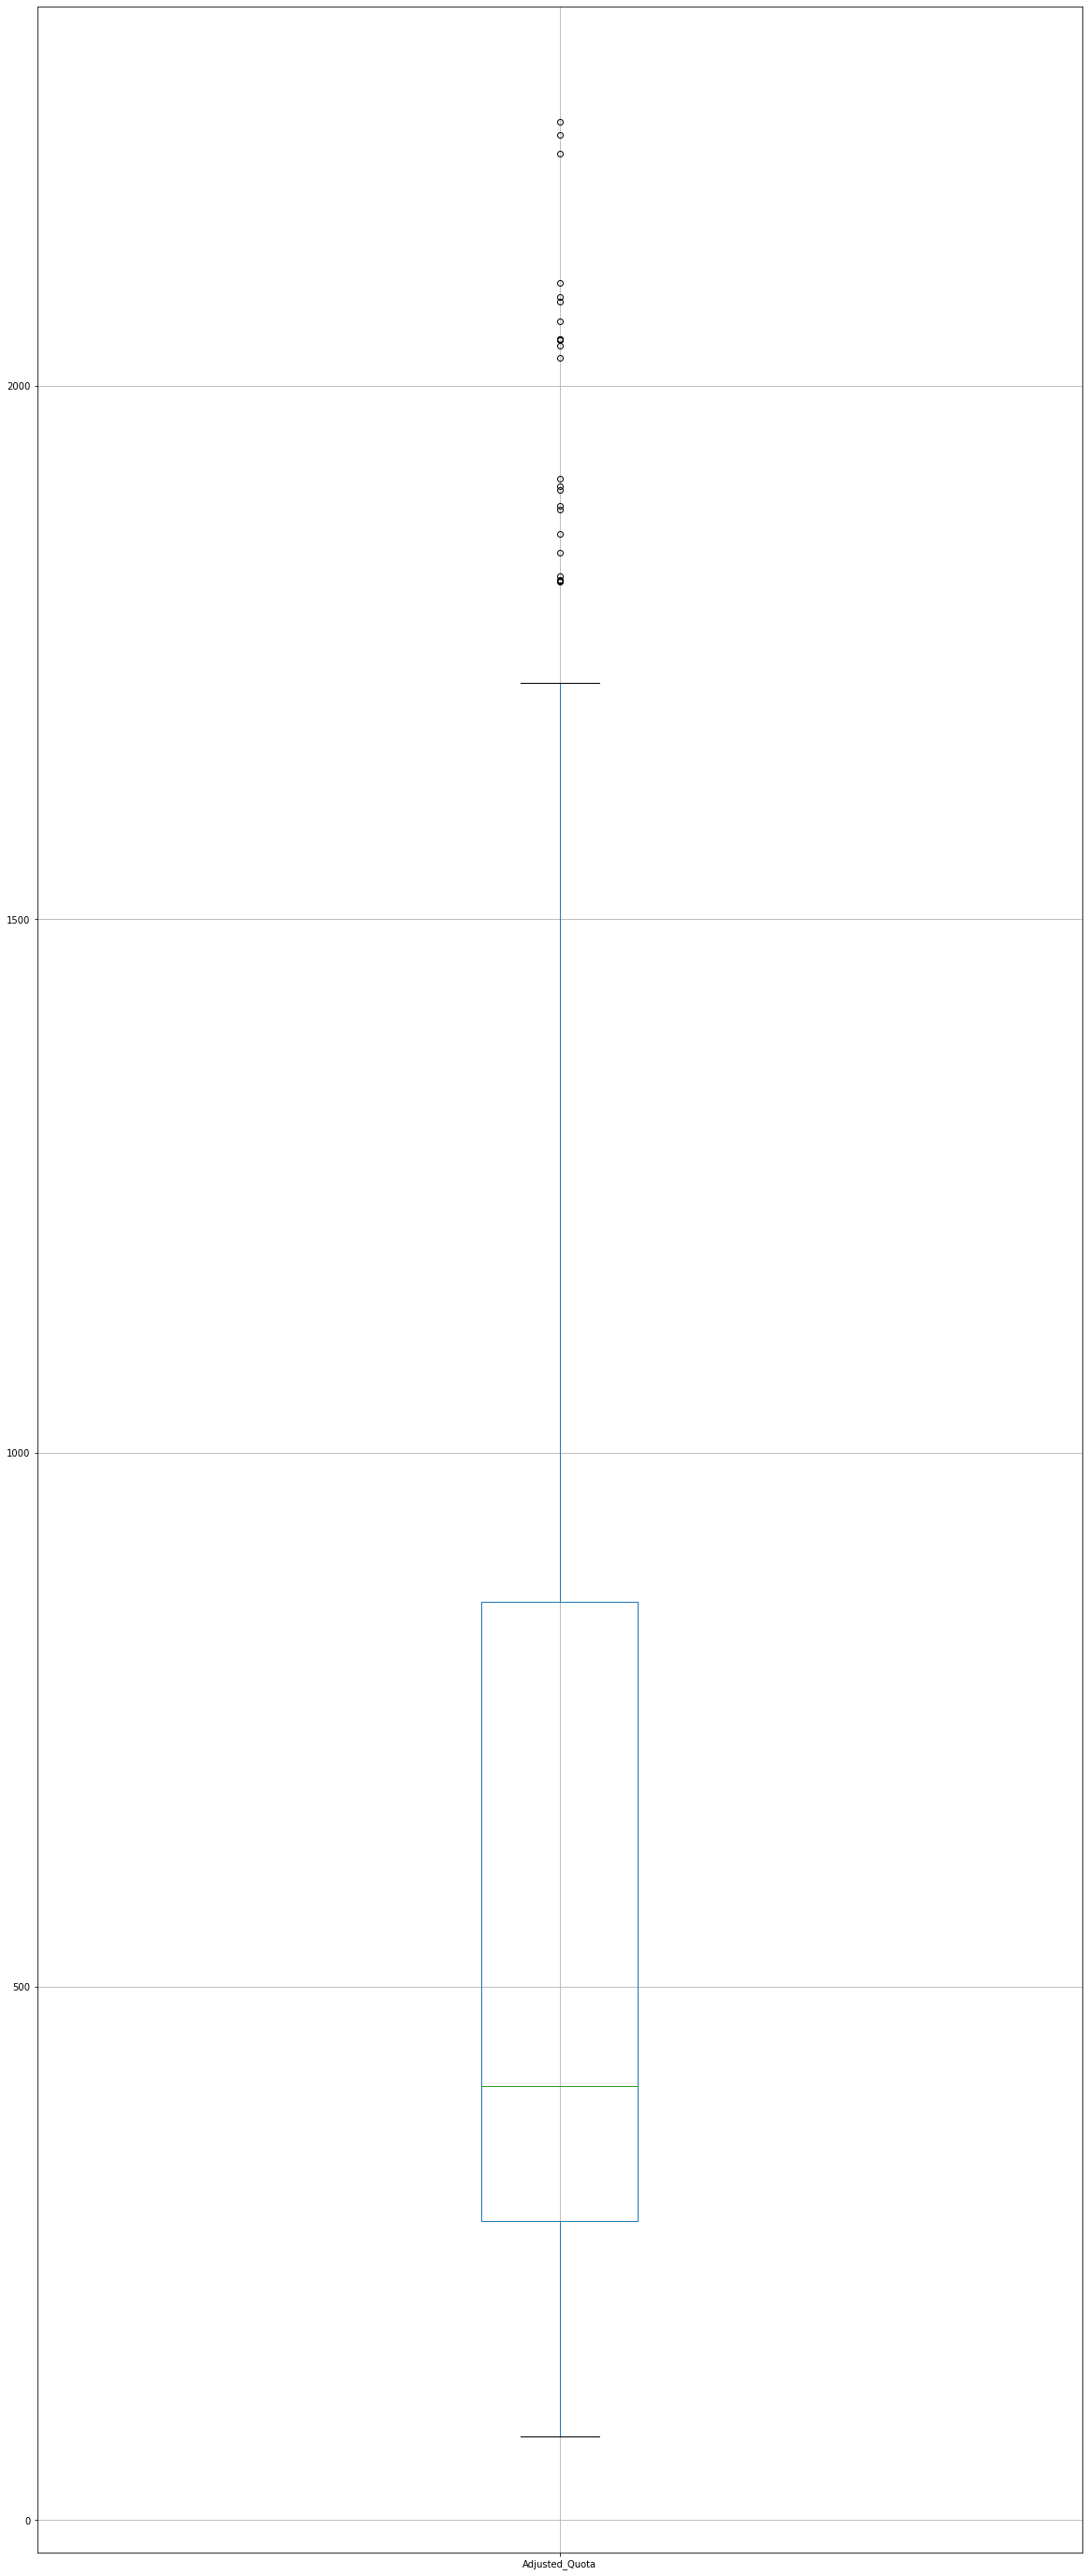

In [233]:
# checking more vividly
import matplotlib.pyplot as plt
data_table2.boxplot(column=['Adjusted_Quota'],figsize=(20,50))
plt.show()

##### it looks like there are so many outliers for this column. However since quota is related to supply, its not right to delete or change the values. so we will let it be so that we dont mislead the results

In [234]:
# adding a date column
data_table2['Date'] = pd.to_datetime(data_table2['month'])

In [235]:
data_table2 = data_table2.set_index('Date')

In [236]:
data_table2

,month,vehicle_class,Adjusted_Quota,Adj_Prem
Date,,,,
2010-01-01,2010-01,Category A,1151.5,19501.5
2010-01-01,2010-01,Category B,702.0,20795.0
2010-01-01,2010-01,Category C,177.0,19545.5
2010-01-01,2010-01,Category E,587.0,20894.0
2010-02-01,2010-02,Category A,1151.0,20164.5
...,...,...,...,...
2022-04-01,2022-04,Category E,182.0,97900.0
2022-05-01,2022-05,Category A,618.5,69451.0
2022-05-01,2022-05,Category B,527.5,93989.5


In [238]:
#exporting dataset so that i can explore more in tableau 
data_table2.to_csv('coe_editedd.csv')

In [97]:
# using tableau to explore abit more 

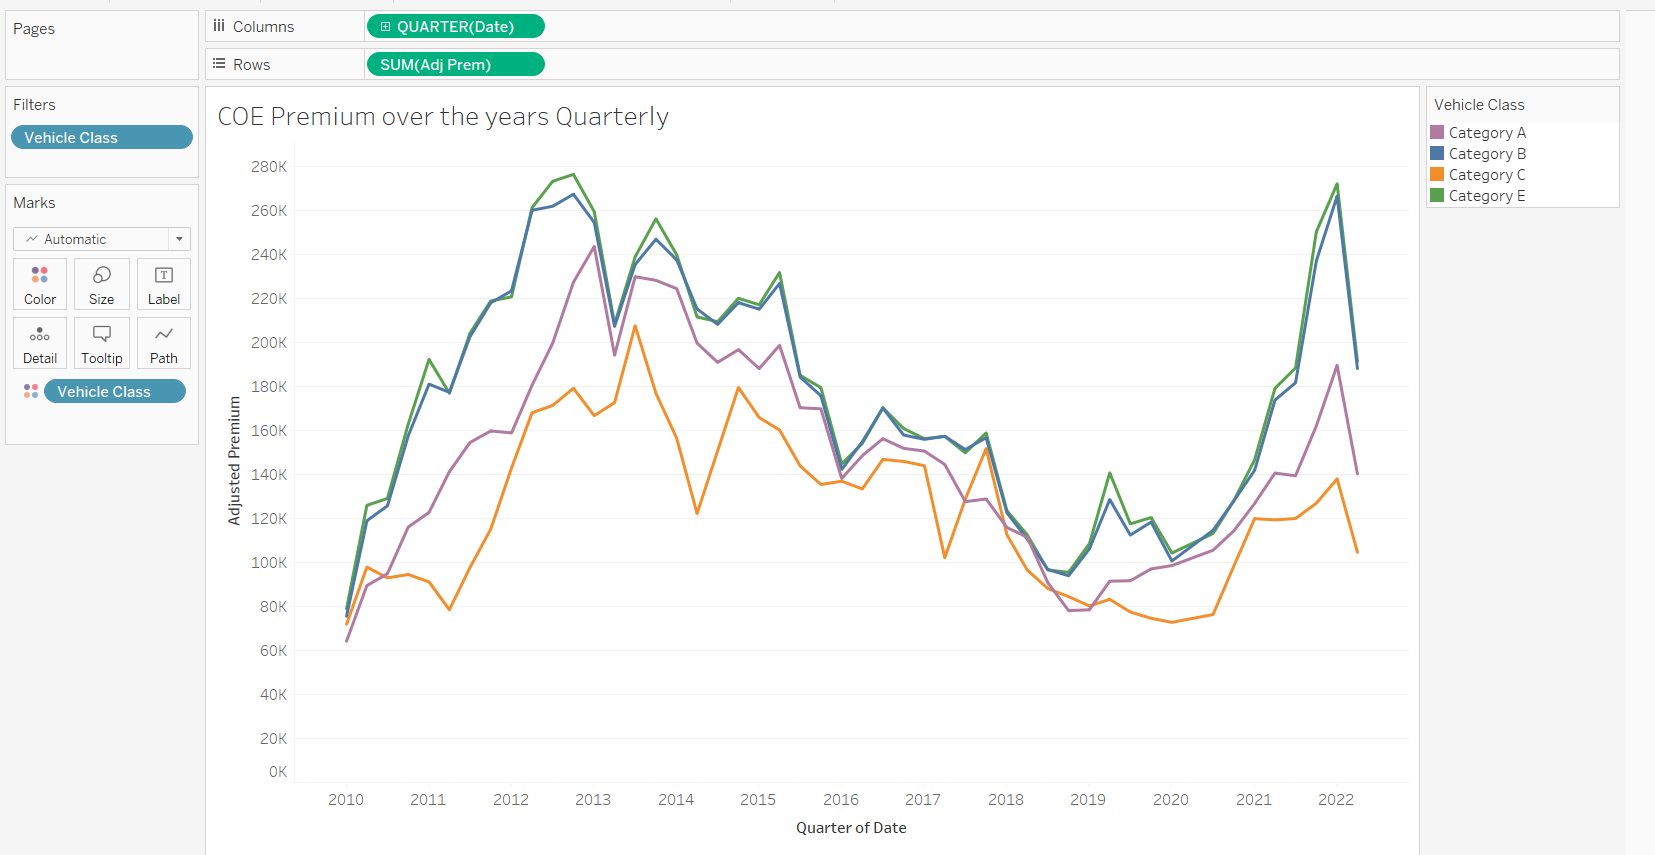

###### Data is until May 2022 so we cant justify if the drop will continue or not
as you can see above, the trend of category E is VERY closely related to the trend of category B 
###### Research and News prove that most people who buy from category E buys luxury cars which category B.
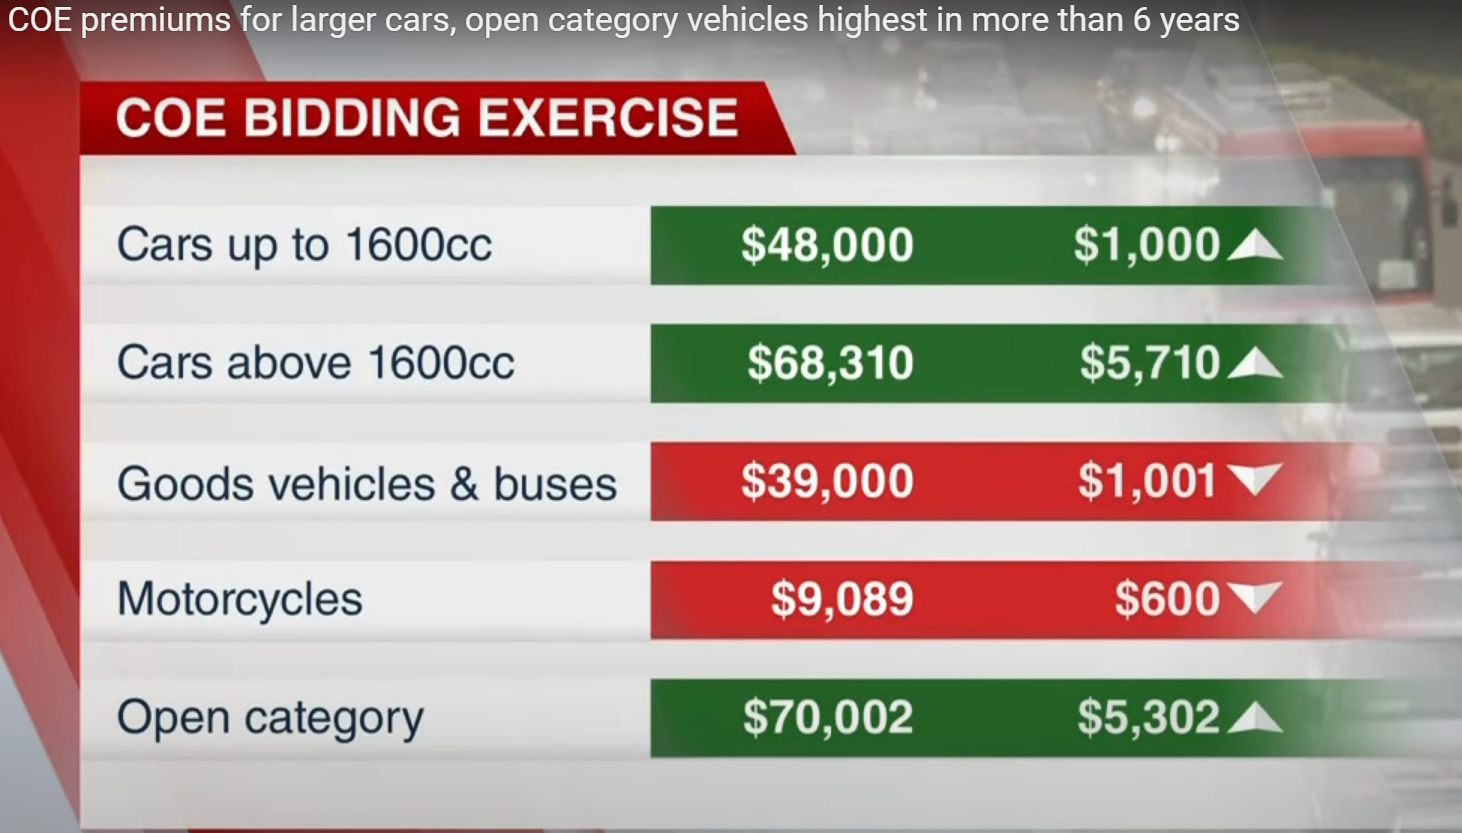
###### This screenshot was taken from https://www.youtube.com/watch?v=tws3xTa6UmA 
###### From the above CNA news, you can see how closely related Category E are with Category B in terms of the price increase


### Exploring Factors of COE 

#### 1. Population Growth

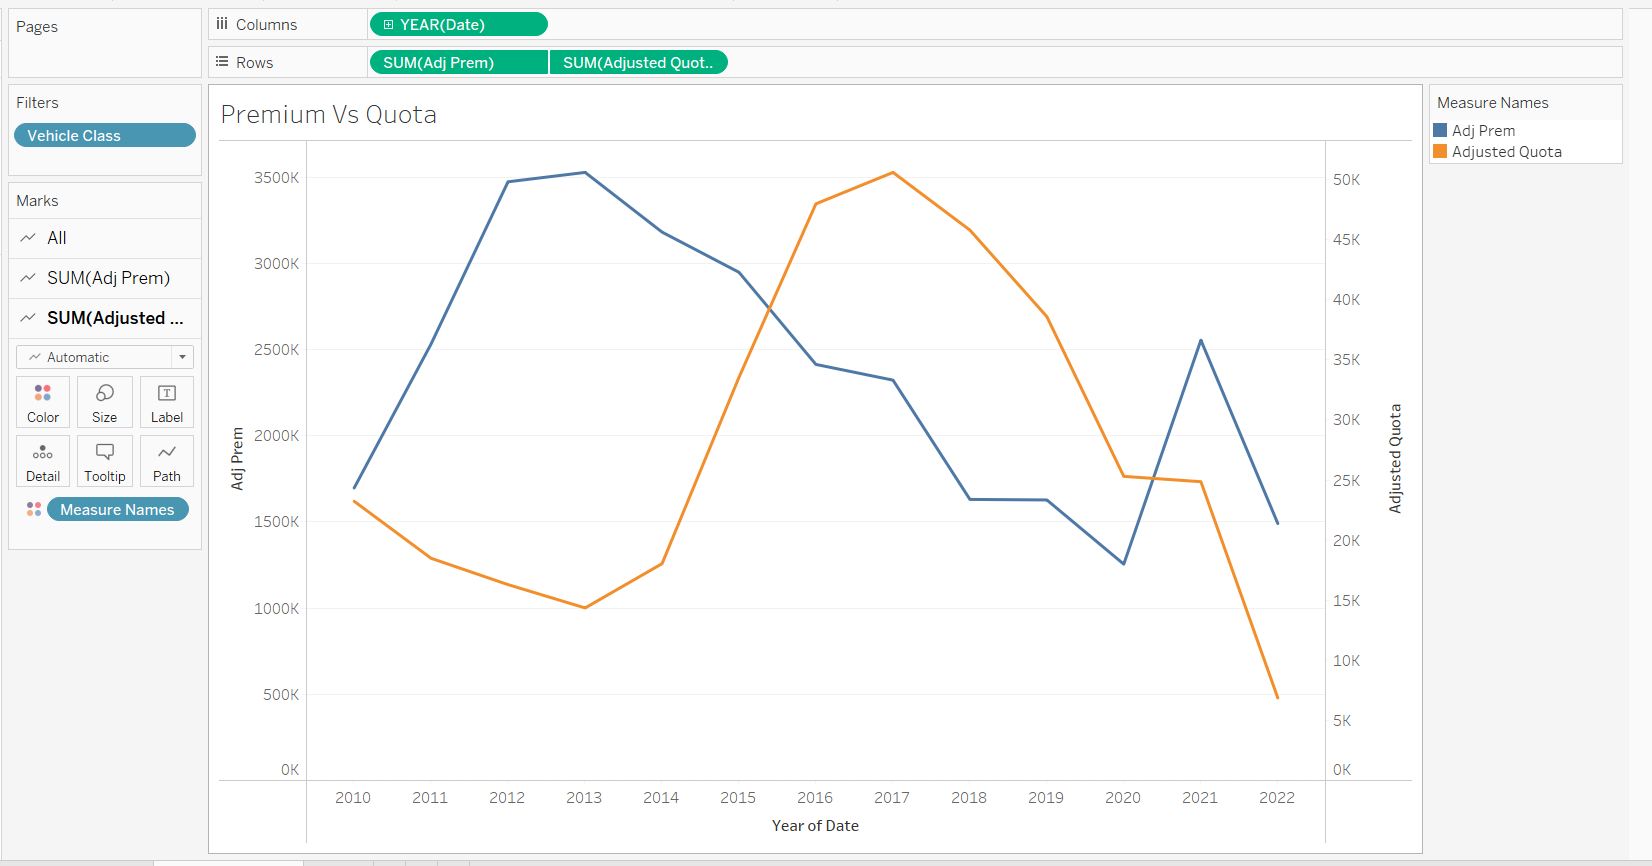

##### As you can see from the above image, Premium and Quota are inversely proportional! Which in fact  makes sense, because there's a high Quota, high supply, the premium price will be low. However if there is limited supply, only a certain number of people can buy which means the coe price will be increased 

#### Dataset is mostly cleaned and explored so we will go to the next step!

#### Once research was done, it seems that somehow theres some part of relationship or impact between the coe and these factors. so lets use these factors to see if theres any thing we can conclude or find about

##### we will clean and do some feature engineering and then compare in tableau

1. Population Growth 

In [98]:
popG_df = pd.read_csv("data/population.csv")

In [99]:
popG_df

,Data Series,Total Population
0,2021,5453566
1,2020,5685807
2,2019,5703569
3,2018,5638676
4,2017,5612253
...,...,...
67,1954,1248200
68,1953,1191800
69,1952,1127000
70,1951,1068100


In [100]:
popG_df['Date'] = pd.to_datetime(popG_df['Data Series'],format='%Y')

In [101]:
popG_df

,Data Series,Total Population,Date
0,2021,5453566,2021-01-01
1,2020,5685807,2020-01-01
2,2019,5703569,2019-01-01
3,2018,5638676,2018-01-01
4,2017,5612253,2017-01-01
...,...,...,...
67,1954,1248200,1954-01-01
68,1953,1191800,1953-01-01
69,1952,1127000,1952-01-01
70,1951,1068100,1951-01-01


In [102]:
popG_dff = popG_df.set_index('Date')

In [103]:
popG_dff.drop('Data Series',axis = 1) 

,Total Population
Date,
2021-01-01,5453566
2020-01-01,5685807
2019-01-01,5703569
2018-01-01,5638676
2017-01-01,5612253
...,...
1954-01-01,1248200
1953-01-01,1191800
1952-01-01,1127000


In [104]:
popG_dff.to_csv('population_editedd.csv')

In [34]:
## Exploring in Tableau - Comparing Population & Premium

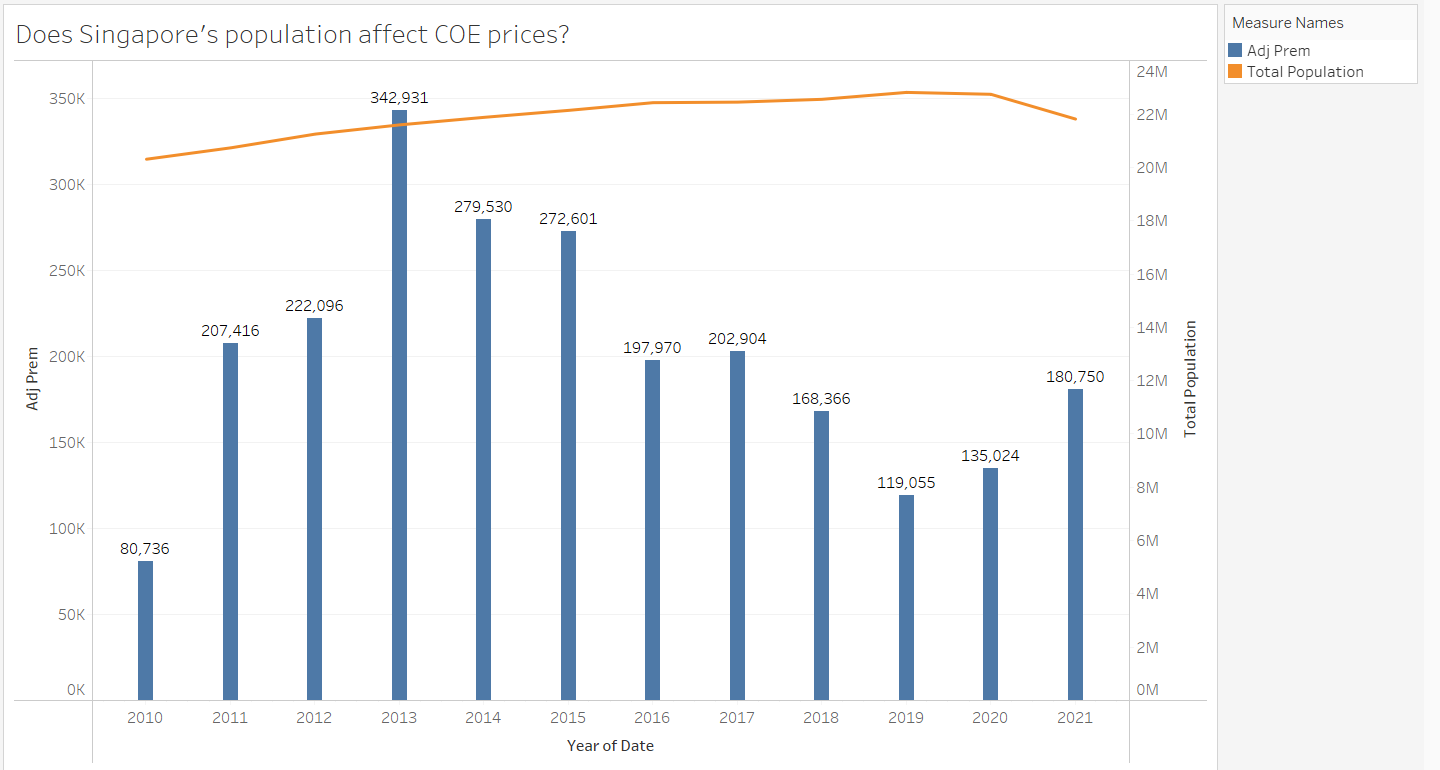

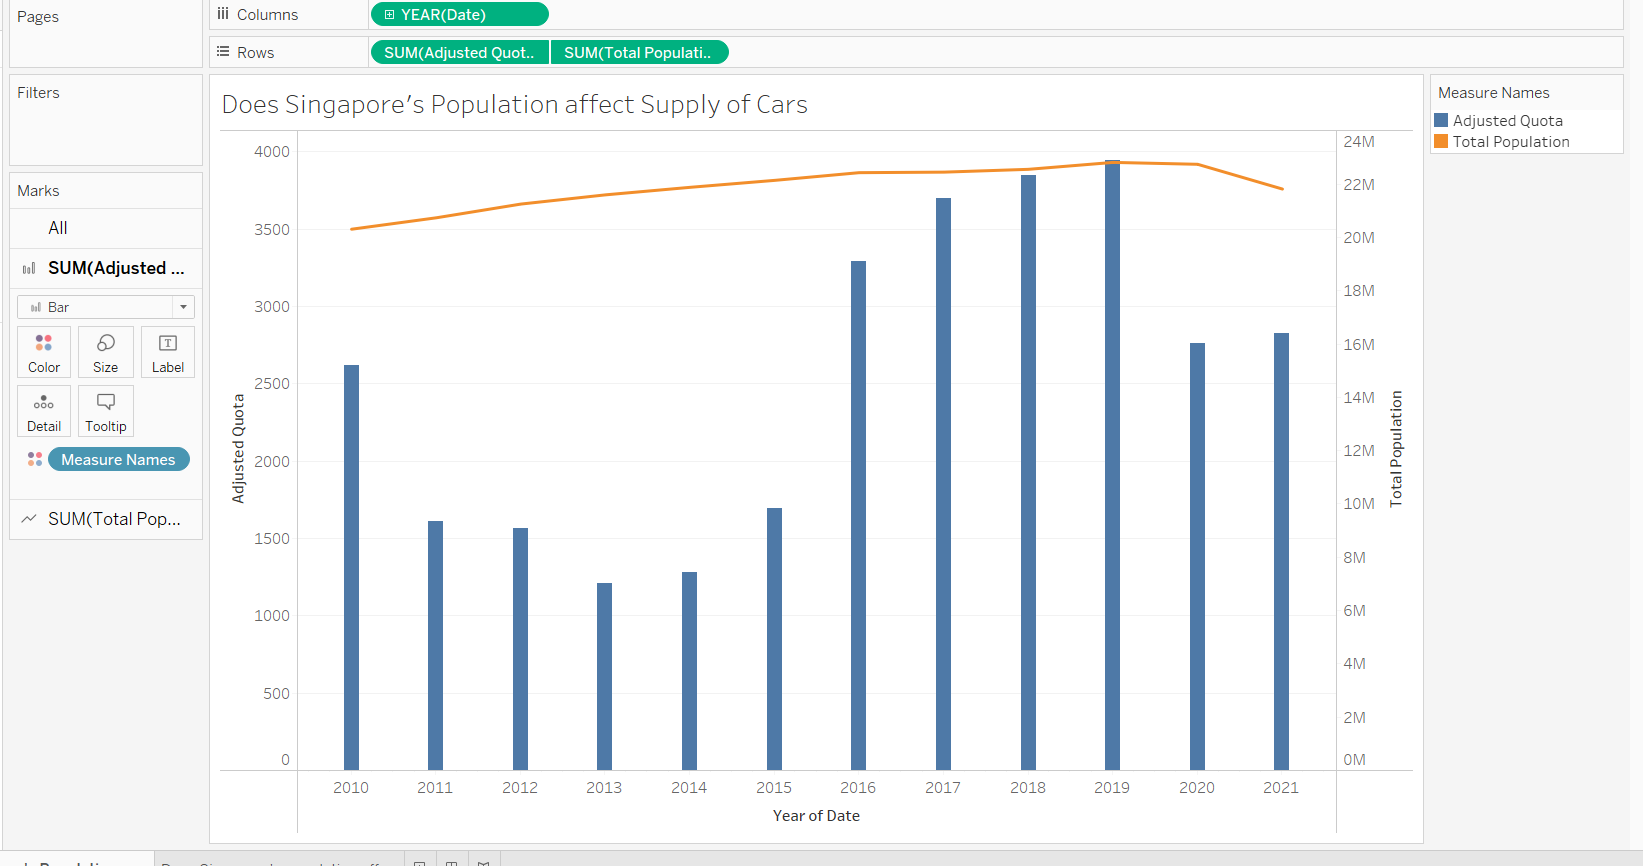

In [239]:
### Although population size is increasing, the greater the population, more supply & more demand of cars is needed however, the visualize say otherwise!
## Concluding :  theres no trend found for both the variables thus population doesnt affect COE price based on data used here! 

2. Gross Domestic Product

This dataset was found in https://tablebuilder.singstat.gov.sg/table/TS/M015651. However this dataset is in quarterly data format, we will do some feature engineering so that its easier to compare!

In [35]:
gdp_dataset = pd.read_csv("data/gdp_data.csv")

In [36]:
gdp_dataset

,Data Series,GDP At Current Market Prices
0,2022 1Q,141868.5
1,2021 4Q,138514.8
2,2021 3Q,133636.1
3,2021 2Q,132093.5
4,2021 1Q,129107.5
...,...,...
184,1976 1Q,3545.1
185,1975 4Q,3693.0
186,1975 3Q,3519.3
187,1975 2Q,3307.0


In [37]:
### as you can see the above dataset in quarterly version.I could only find in quarterly data in Singstat.gov.sg.
#### so we will do some feature engineering by converting quarterly series to monthly series

In [38]:
gdp_dataset['GDP At Current Market Prices'] = gdp_dataset['GDP At Current Market Prices']
# here we get Q_, the number
gdp_dataset['Quarter'] = gdp_dataset['Data Series'].str.strip().str[-2:-1]

In [39]:
# here we get the year
gdp_dataset['Year'] = gdp_dataset['Data Series'].str.strip().str[0:4]

In [40]:
gdp_dataset['Month'] = gdp_dataset['Quarter'].astype('int64')*3 # we know that 1 Quarter is equal 3 months ( multipy by 3)

In [41]:
gdp_dataset['Date'] = gdp_dataset['Year'].astype('int64')*100 + gdp_dataset['Month']*1 #make it such that it is yearmonth

In [42]:
gdp_dataset['Date'] = pd.to_datetime(gdp_dataset['Date'],format='%Y%m')

In [43]:
gdp_dataset = gdp_dataset[['Date','GDP At Current Market Prices']]
gdp_dataset = gdp_dataset.rename(columns= {'GDP At Current Market Prices':'GDP'})

In [44]:
gdp_dataset

,Date,GDP
0,2022-03-01,141868.5
1,2021-12-01,138514.8
2,2021-09-01,133636.1
3,2021-06-01,132093.5
4,2021-03-01,129107.5
...,...,...
184,1976-03-01,3545.1
185,1975-12-01,3693.0
186,1975-09-01,3519.3
187,1975-06-01,3307.0


In [45]:
gdp_dataset.isnull().sum()

Date    0
GDP     0
dtype: int64

In [46]:
gdp_dataset.shape

(189, 2)

In [47]:
#resampling here because some months data is not given, so using mean, we are using interploting! & if we have the same date, we will do a mean of those values
gdp_edited = gdp_dataset.set_index('Date').resample('MS').mean().interpolate(method = 'linear') 

In [48]:
gdp_edited

,GDP
Date,
1975-03-01,3209.400000
1975-04-01,3241.933333
1975-05-01,3274.466667
1975-06-01,3307.000000
1975-07-01,3377.766667
...,...
2021-11-01,136888.566667
2021-12-01,138514.800000
2022-01-01,139632.700000


###### Once feature engineering is done, we will export the dataset and use it later in Tableau

In [129]:
gdp_edited.to_csv('gdp_dataset.csv')

#### After Exploring in Tableau, 

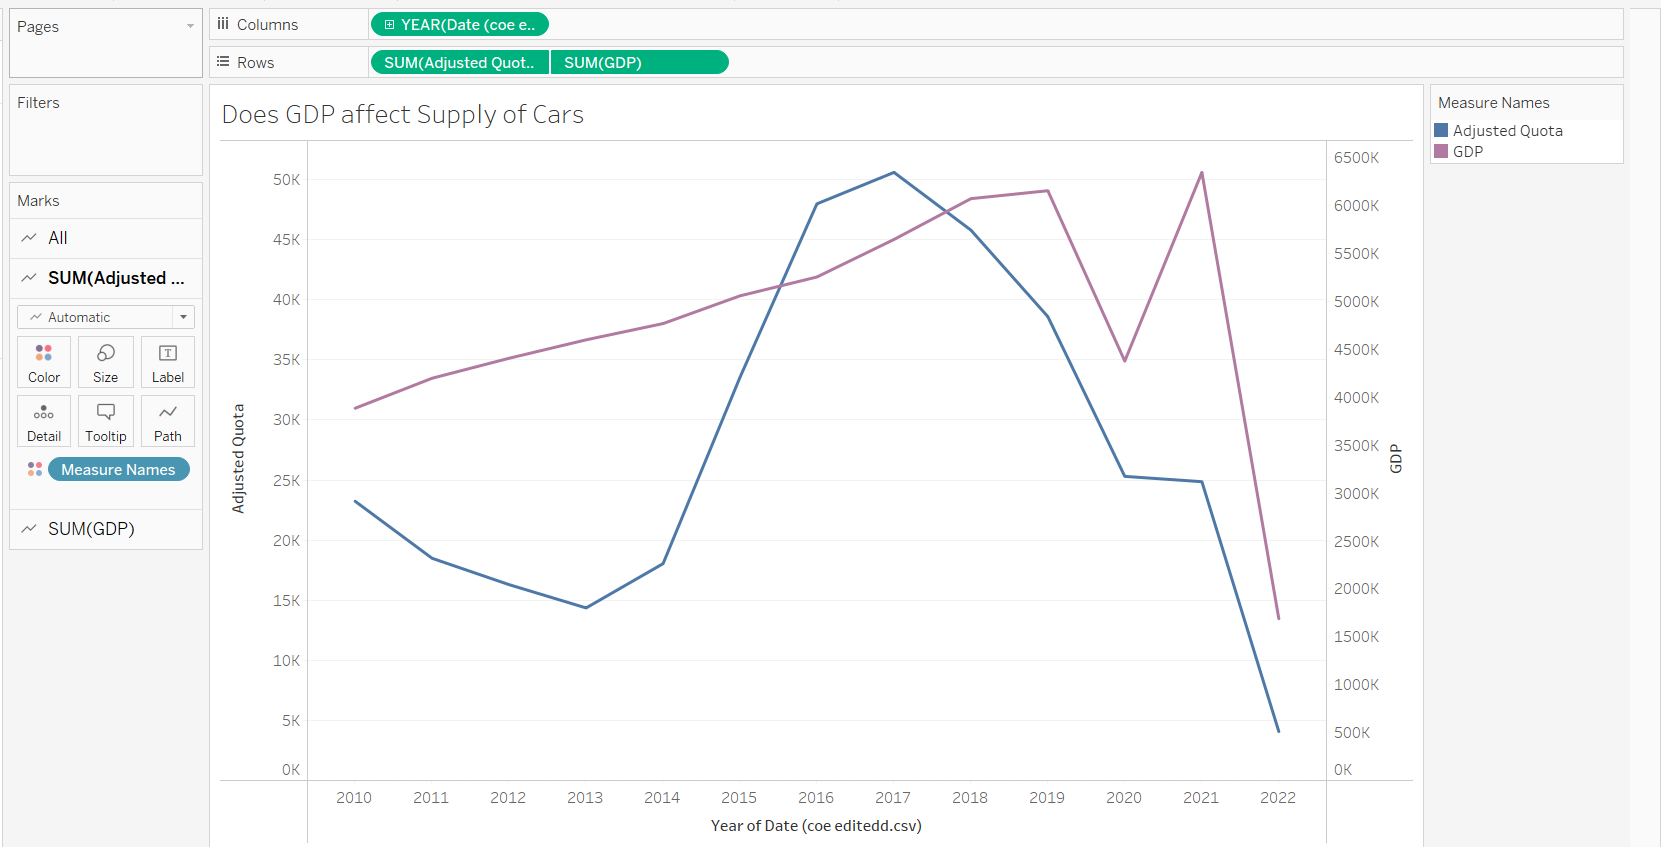

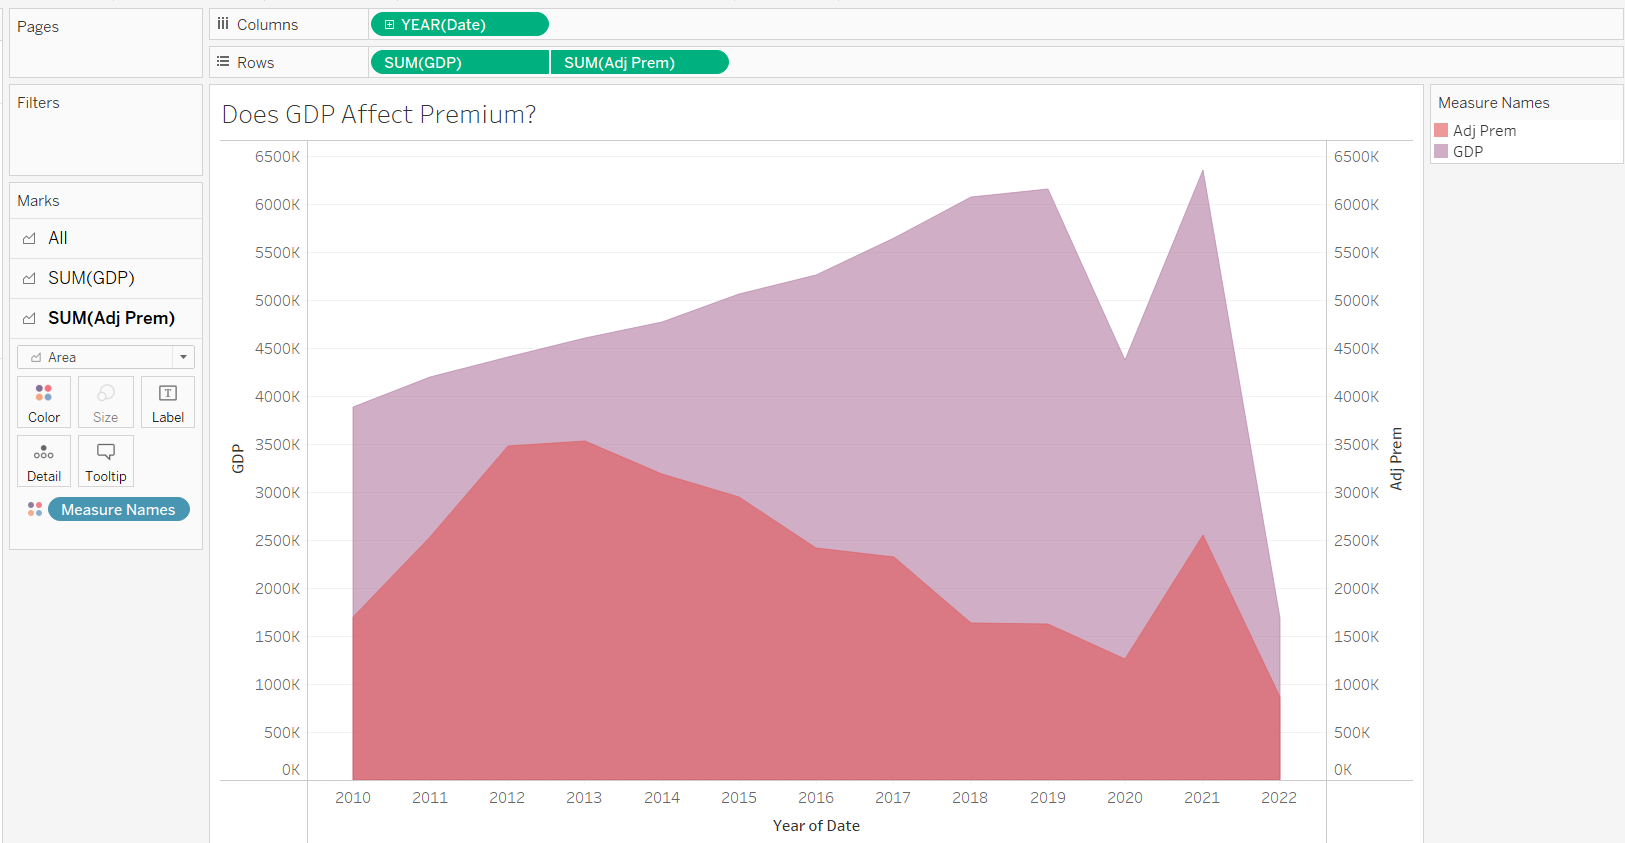

##### As you can see, although from 2014 to 2018, the trend in GDP Growth and the COE price is not correlated or there are no relationship to be found, But looking at trend from 2018 - 2019, a slight increase in GDP can be found, a slight increase was also found. When GDP had a steep drop from 3,078344 in 2019 to 2,188 969 in 2020.  Similiarly there was drop in GDP too , from $974,823 dollars  in 2019 to 691,297 dollars in 2020.  Similarly when there was steep drop in GDP from 2021 to 2022, it was directly proportional and trend was similar

hence we can say that if GDP Growth were to fluctuate, the price of COE might also fluctuate

3. Unemployment Rate

In [130]:
## the dataset found is in annual rate

In [49]:
unem_r = pd.read_csv("data/unemployment.csv")

In [50]:
unem_r['Date'] = pd.to_datetime(unem_r['Data Series'],format='%Y')

In [51]:
unem_r.head()

,Data Series,Total Unemployment Rate,Date
0,2021,2.7,2021-01-01
1,2020,2.9,2020-01-01
2,2019,2.3,2019-01-01
3,2018,2.1,2018-01-01
4,2017,2.2,2017-01-01


In [134]:
unem_rr = unem_r.set_index('Date')

In [135]:
unem_rr.drop('Data Series',axis=1)

,Total Unemployment Rate
Date,
2021-01-01,2.7
2020-01-01,2.9
2019-01-01,2.3
2018-01-01,2.1
2017-01-01,2.2
2016-01-01,2.1
2015-01-01,2.0
2014-01-01,1.9
2013-01-01,2.0


In [136]:
###### Once feature engineering is done, we will export the dataset and use it later in Tableau

In [137]:
unem_rr.to_csv('unemployment_edit.csv')

#### After Exploring in Tableau, 

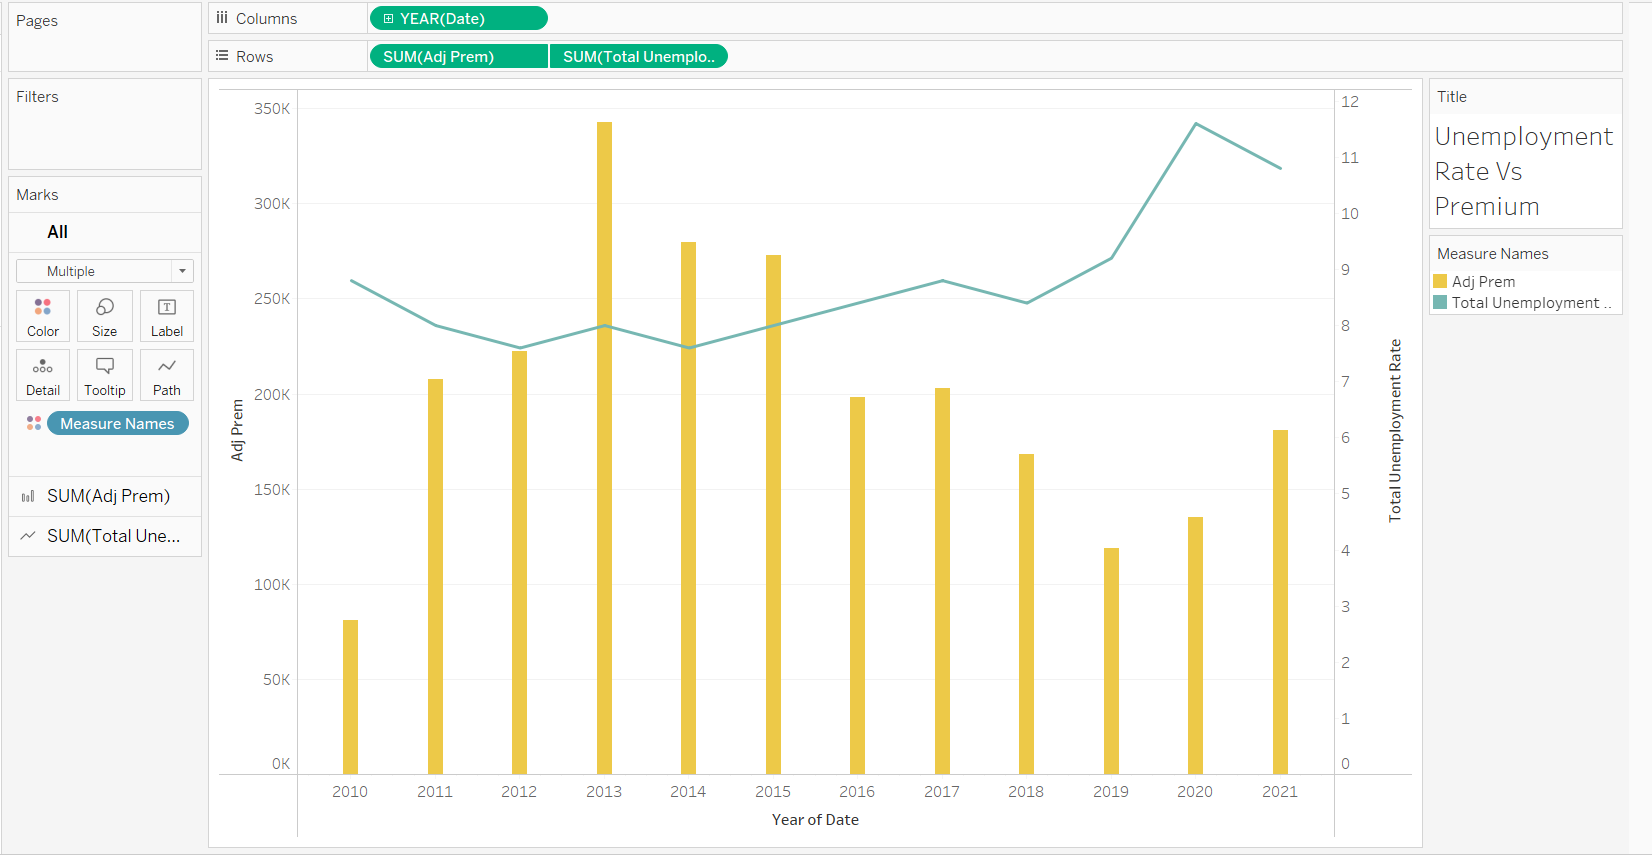

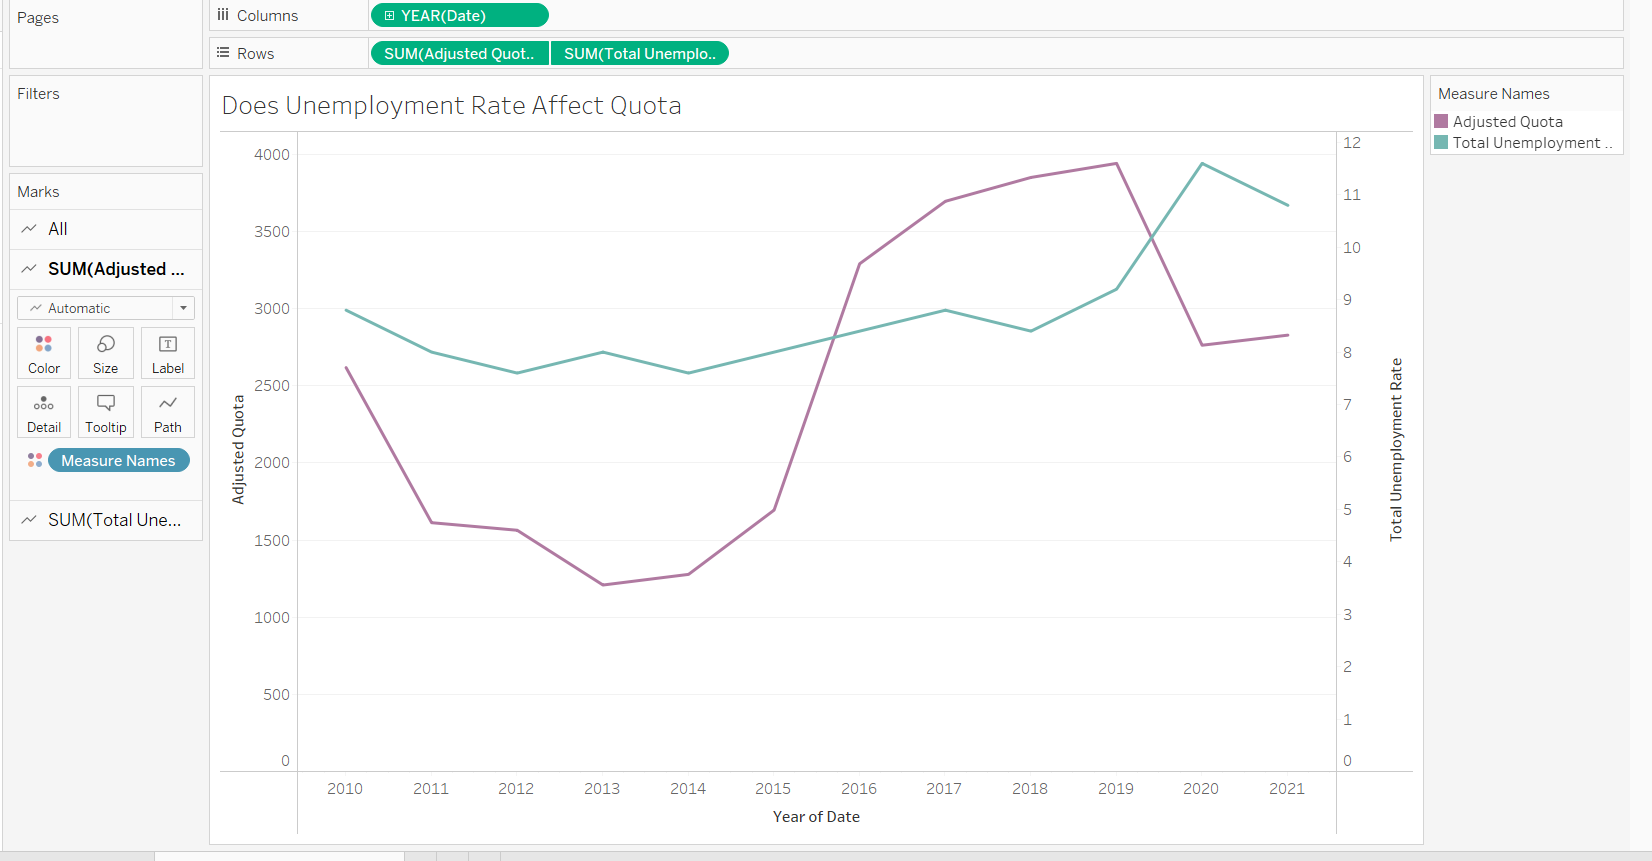

##### as you can see from the graph, the trend from both premium and unemployment rate fluctuates alot but it is not a similar or directly proportional, hence i would say there might some impact abit to the price of COE but not much in general 

4. Deregistered Vehicles

In [138]:
import pandas as pd
dereg_dataset = pd.read_csv("deregistration_data.csv")

In [140]:
dereg_dataset['Date'] = pd.to_datetime(dereg_dataset['month'],format="%Y-%m-%d")

In [141]:
dereg_dataset

,month,category,number,Date
0,2014-01,Category A,1011,2014-01-01
1,2014-01,Category B,927,2014-01-01
2,2014-01,Category C,711,2014-01-01
3,2014-01,Category D,760,2014-01-01
4,2014-01,Taxis,143,2014-01-01
...,...,...,...,...
595,2022-04,Category B,977,2022-04-01
596,2022-04,Category C,916,2022-04-01
597,2022-04,Category D,944,2022-04-01
598,2022-04,Taxis,116,2022-04-01


In [142]:
dereg_dataset.set_index('Date')

,month,category,number
Date,,,
2014-01-01,2014-01,Category A,1011
2014-01-01,2014-01,Category B,927
2014-01-01,2014-01,Category C,711
2014-01-01,2014-01,Category D,760
2014-01-01,2014-01,Taxis,143
...,...,...,...
2022-04-01,2022-04,Category B,977
2022-04-01,2022-04,Category C,916
2022-04-01,2022-04,Category D,944


In [52]:
## Export the dataset so that we can Explore in Tableau

In [143]:
dereg_dataset.to_csv('dereg_dataset.csv')

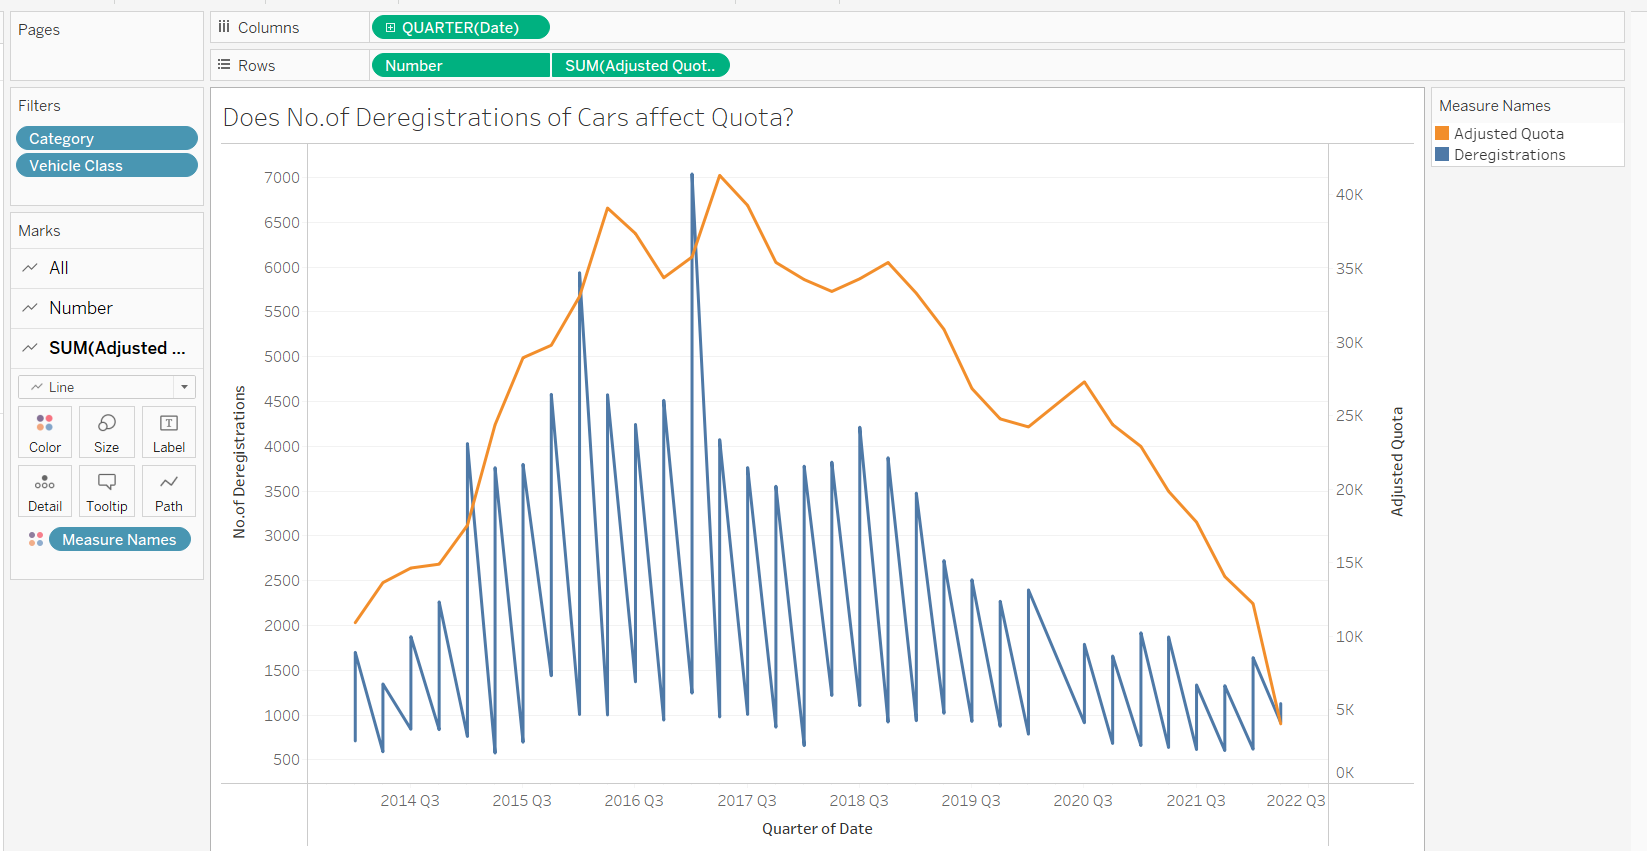

###### As you can see from the above graph, when the number of Deregistrations increases, the quota increases because of the high number of supply. similarly when the no.of deregistrations decreases, the quota decreases due to supply decreasing

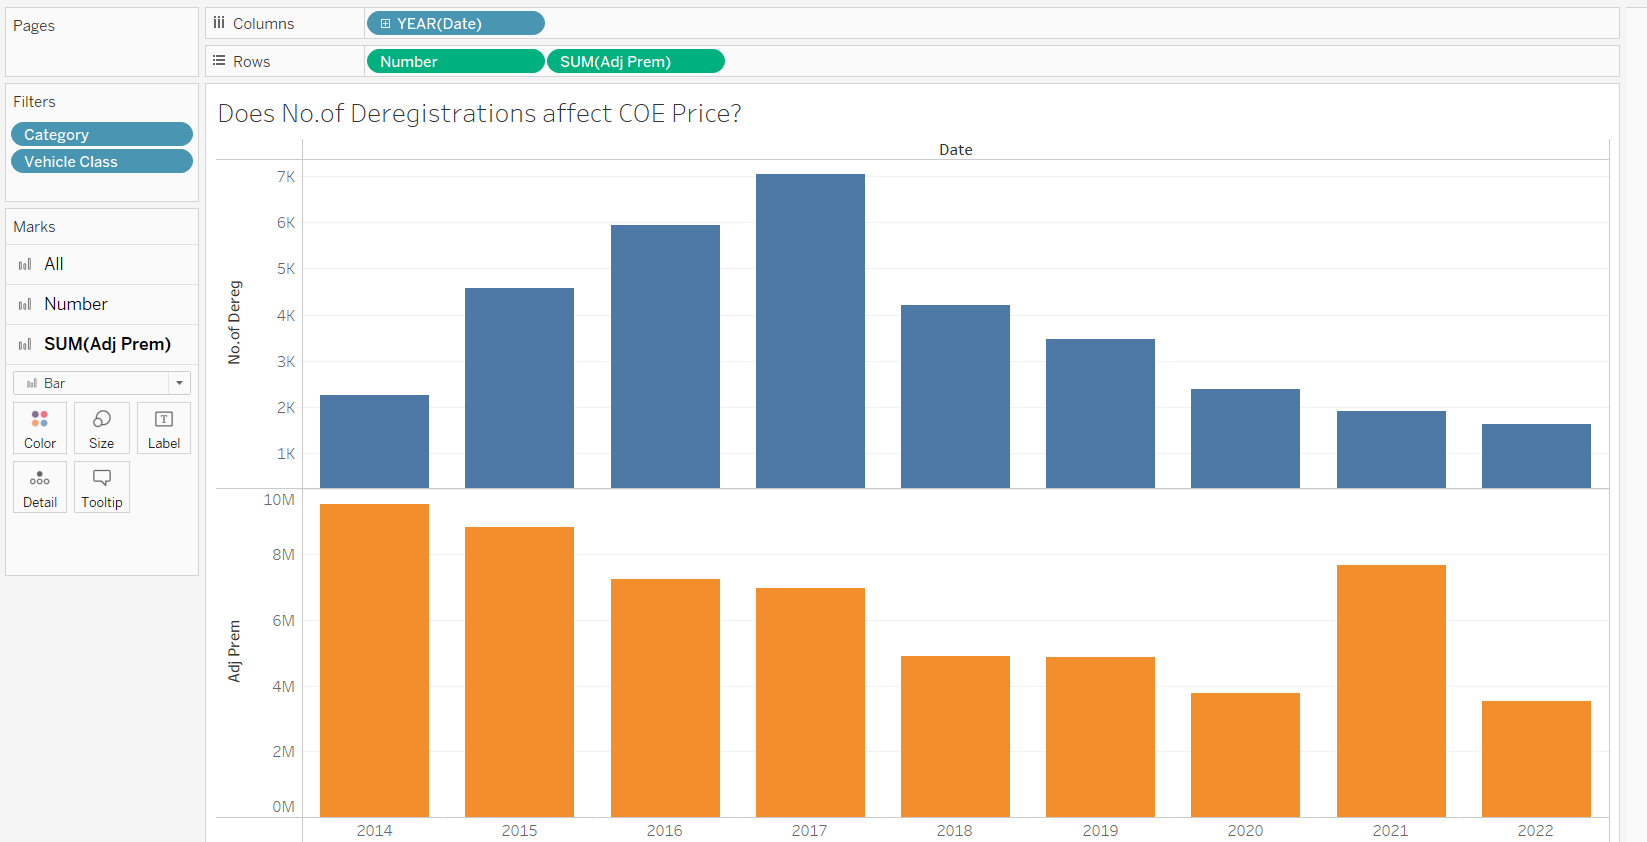

###### as you can see that the number of deregisterations are inversely propertional from 2014 onwards, as when supply is high, coe price values decreases. However if supply is less & demand is high then COE price increases. This is similar to Quota. This is because Quota is measured based on the number of deregistered vechicles plus 0.25% net increase of total number of car population.

lets move on to predicting of dataset!